# ***SIP LAB 4***
Krisha Chemburkar

I012

B1 Batch

Semester IV

BTech AI



# ***Aim:***

a. To implement following point processing techniques on the given image and comprehend the results

    i. To write a program in PYTHON to obtain image negative of an image

    ii. To write a program in PYTHON to obtain thresholding of an image

    iii. To write a program in PYTHON to obtain grey level slicing of an image without background

    iv. To write a program in PYTHON to obtain grey level slicing of an image with background

b. Apply a suitable spatial domain filtering technique to enhance

    i. Implement blurring on the given image

    ii. Comment on your choice or a particular filtering technique for the given image

Analyze the effect of various masks size for the filter used and comprehend your findings.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


#***Part A***

### ***Image Negative***

In [2]:
img1 = cv2.imread('/content/cameraman.tif',0) #reading the image
type(img1)

numpy.ndarray

In [3]:
l = 256   #no of intensity values
img1_neg=l-1-img1   #convert to negative

Text(0.5, 1.0, 'Negative Image')

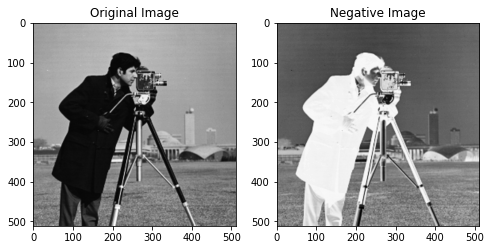

In [24]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(img1, cmap="gray")
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(img1_neg, cmap="gray")
plt.title("Negative Image")

### ***Thresholding***

In [6]:
thr = int(input("enter the threshold value: "))


enter the threshold value: 100


In [7]:
img2 = cv2.imread('/content/Pollen.tif',0)
img2_thr = img2.copy()    #make a copy of image
img2.shape

(889, 889)

In [8]:
l=256
for i in range(0,889):
  for j in range(0,889):
    if img2[i][j]>thr:
      img2_thr[i][j]=l-1    #if pixel intensity is greater than the threshold value then change it to max value
    else:
      img2_thr[i][j]=0      #else change it to 0

Text(0.5, 1.0, 'Thresholding Image')

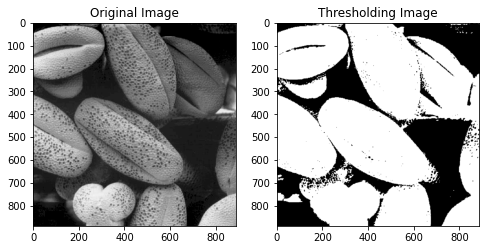

In [25]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(img2, cmap="gray")
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(img2_thr, cmap="gray")
plt.title("Thresholding Image")

### ***Grey Level Slicing Without Background***

In [10]:
a = int(input("Enter the lower bound: "))
b = int(input("Enter the upper bound: "))

Enter the lower bound: 75
Enter the upper bound: 175


In [11]:
img3 = cv2.imread('/content/Fig0312(a)(kidney).tif',0)

In [12]:
img3.shape

(828, 720)

In [13]:
img3_gwb = np.zeros((828,720),dtype=int)

In [14]:
l = 256
for i in range(0,828):
  for j in range(0,720):
    if a<img3[i][j]<b:    #if pixel value lies between a and b then change value to highest
      img3_gwb[i][j]=l-1
    else:
      img3_gwb[i][j]=0    #else change it to 0

Text(0.5, 1.0, 'Image after Grey Level Slicing w/o BG')

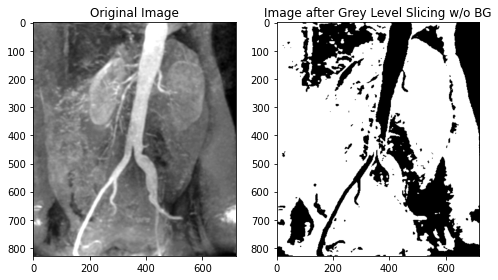

In [27]:
plt.figure(figsize=(8,10))
plt.subplot(1,2,1)
plt.imshow(img3,cmap="gray")
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(img3_gwb,cmap="gray")
plt.title("Image after Grey Level Slicing w/o BG")

### ***Grey Level Slicing With Background***

In [16]:
img3_gb=img3.copy()

In [17]:
l = 256
for i in range(0,828):
  for j in range(0,720):
    if a<img3[i][j]<b: #if value lies between a and b then change value to highest else keep it as it is
      img3_gb[i][j]=l-1
    

Text(0.5, 1.0, 'Image after Grey Level Slicing with BG')

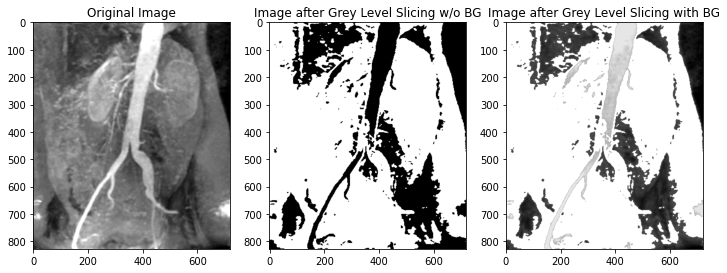

In [28]:
plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
plt.imshow(img3,cmap="gray")
plt.title("Original Image")
plt.subplot(1,3,2)
plt.imshow(img3_gwb,cmap="gray")
plt.title("Image after Grey Level Slicing w/o BG")
plt.subplot(1,3,3)
plt.imshow(img3_gb,cmap="gray")
plt.title("Image after Grey Level Slicing with BG")

# ***Part B***

### ***Neighbourhood Processing in Spatial Domain***

In [19]:
img4 = cv2.imread('/content/Fig0333(a)(test_pattern_blurring_orig).tif',0)
[m,n]=img4.shape  #storing shape of the image

In [20]:
'''img4_sd1 = np.zeros((500,500), dtype=int)
img4_sd2 = np.zeros((500,500), dtype=int)'''

In [29]:
def npsd(ms, img):
  img_ret = np.zeros((img.shape), dtype=int)
  b= ms
  a=b//2
  #applying neighbourhoof processing 
  for i in range(1,m-1):
      for j in range(1,n-1):
          temp= img[i-a:i+a,j-a:j+a] 
          
          constant= np.sum(temp)
          img_ret[i,j]= constant//b**2
  return img_ret

In [30]:
img4_sd1 = npsd(7,img4)
img4_sd2 = npsd(15,img4)

Text(0.5, 1.0, 'Image after uing mask of size 15')

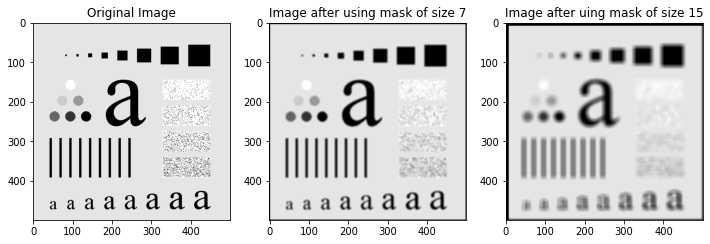

In [31]:
plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
plt.imshow(img4,cmap="gray")
plt.title("Original Image")
plt.subplot(1,3,2)
plt.imshow(img4_sd1,cmap="gray")
plt.title("Image after using mask of size 7")
plt.subplot(1,3,3)
plt.imshow(img4_sd2,cmap="gray")
plt.title("Image after uing mask of size 15")

# ***Conclusion***
In this practical we applied various image transformation and enhancement techniques. In point processing we tried the negative, thresholding and grey level slicing with and without the background and understood the difference before and after applying the particulr technique.

In Neighbourhood Processing in spatial domain we applied the blurring effect using a mask of various sizes. As you can see from the above images, as the mask size increases the blurring effect also increases.